***分享連結：*** https://colab.research.google.com/drive/1DxfUN3ah7XVvainYDDdVbW7DGcR1BZKd?usp=sharing

# **安裝相關套件與字體**

In [40]:
pip install jieba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
pip install zhon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
## 下載中文字體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2023-03-16 07:45:05--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.63.100, 172.253.63.139, 172.253.63.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6g892ieru1udigkp0thoqi48889f710v/1678952700000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=a44e5404-e11c-4d45-ab2e-93fe31b0989e [following]
--2023-03-16 07:45:06--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6g892ieru1udigkp0thoqi48889f710v/1678952700000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=a44e5404-e11c-4d45-ab2e-93fe31b0989e
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to doc-0k

# **取得原始資料與資料預處理**

In [43]:
## 取得原始文字黨 & 去除標點符號
import requests
import string
from zhon.hanzi import punctuation

url = 'https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt'
response = requests.get(url)
data = response.text

data = data.replace(' ', '')
data = data.replace('\t', '')
for i in string.punctuation:
    data = data.replace(i, '')
for i in punctuation:
    data = data.replace(i, '')
spacial_punctuation = ['▂', '━', '︴', '←', '┌', '︹', '─', '∷', '﹎', '︺', '☁', '▍', '■', 'ﶝ', '☎', '☹', '❏', '\ue7ee', '✈', '□', '┐', '☺', '♥']
for i in spacial_punctuation:
    data = data.replace(i, '')

In [44]:
## 切分文章 & 統計文章總數總數（一行視為一文章）
articles = data.split('\n')
lines = len(articles)
print("文章數：", lines)

文章數： 418203


In [45]:
## 斷詞
import jieba

seg_articles = []

for article in articles:
    # seg_article => list([article], article_length)
    seg_articles.append((jieba.lcut(article), len(article)))
print(seg_articles[:4])



[(['為', '什麼', '聖結', '石會', '被', '酸', '而', '這群', '人', '不會質', '感劇本', '成員', '都', '差', '很多', '好', '嗎', '不要', '拿', '腎', '結石來', '污辱', '這群', '人'], 39), (['為', '什麼', '慶祝', '228', '會', '被', '罵', '可是', '慶', '端午', '不會', '因為', '屈原', '不是', '台灣', '人', '是', '楚國人'], 31), (['有', '沒', '有', '戰神', '阿瑞斯', '的', '八卦', '爵士', '就是', '阿瑞斯', '男主角', '最後死', '了'], 25), (['理論', '與', '實務', '最', '脫節', '的', '系', '哪個', '系', '不', '脫節', '你問', '最', '不', '脫節', '的', '簡單', '多', '了'], 27)]


# **計算IDF權重**

In [46]:
## 計算idf
import math
from collections import Counter


iDFs = {}

for article in seg_articles:
    counter = Counter(article[0])
    for item in counter.items():
        exist_idf = iDFs.get(item[0]) 
        if exist_idf:
            iDFs.update({item[0]: exist_idf + item[1]})
        else:
            iDFs[item[0]] = item[1]

for iDF in iDFs.items():
    iDFs[iDF[0]] = math.log(lines/iDF[1], 10)

## 依照idf權重排列
lt_iDFs = sorted(iDFs.items(), key=lambda item:item[1], reverse=True)
lt_iDFs = lt_iDFs

dict_iDFs = {}
for lt in lt_iDFs:
    dict_iDFs[lt[0]] = lt[1]

# **計算TF**

## 重複單詞（計算單詞詞頻時，不同文章同單詞有複數詞頻）

In [47]:
## 計算tf & 依照tf排列
N = 0
rtps = []
for article in seg_articles:
    counter = Counter(article[0])
    for item in counter.items():
        rtps.append((N , item[0], item[1] / article[1]))
        N += 1

rtps = sorted(rtps, key=lambda item:item[2], reverse=True)
print(rtps[:10])

[(2843002, '咩', 1.0), (5148798, '人', 1.0), (5918547, '人', 1.0), (1814120, '啦', 0.9), (2865096, '噢', 0.8636363636363636), (1071932, '喔', 0.8181818181818182), (1467897, '鞥', 0.8), (2501305, '欸', 0.8), (1692088, '欸', 0.7916666666666666), (5497484, '欸', 0.7894736842105263)]


In [48]:
## 計算tf-idfs
rtf_idfs = []
for item in rtps:
    rtf_idfs.append((item[0], item[1], item[2] * iDFs[item[1]]))

rtf_idfs = sorted(rtf_idfs, key=lambda item:item[2], reverse=True)
print(rtf_idfs[:10])

[(1467897, '鞥', 3.3651310367640437), (2865096, '噢', 3.0349711959673664), (671339, '龘', 2.9055791757218588), (1100045, '〩', 2.8681869443416623), (2843002, '咩', 2.845412812796503), (4272194, '卍', 2.6617860374290268), (1792153, '嫑', 2.4953130514586044), (3204088, '吖', 2.424706846292831), (6011347, 'あ', 2.3103210793702367), (5009122, '喵', 2.0170657718982747)]


## 不重複單詞（計算單詞詞頻時，不同文章同單詞只保留最大的詞頻）

In [49]:
## 計算tf (不重複)
import math
from collections import Counter

tfs = {}

for article in seg_articles:
    counter = Counter(article[0])
    for item in counter.items():
        exist_tf = tfs.get(item[0])   
        if exist_tf:
            new_tf = item[1] / article[1]
            tfs.update({item[0]: new_tf if new_tf > exist_tf else exist_tf})
        else:
            tfs[item[0]] = item[1] / article[1]

## 依照tf排列 (不重複)
lt_tfs = sorted(tfs.items(), key=lambda item:item[1], reverse=True)
lt_tfs = lt_tfs[:100]

dict_tfs = {}
for lt in lt_tfs:
    dict_tfs[lt[0]] = lt[1]
print(dict_tfs)

{'人': 1.0, '咩': 1.0, '啦': 0.9, '噢': 0.8636363636363636, '喔': 0.8181818181818182, '欸': 0.8, '鞥': 0.8, '喵': 0.75, '嫑': 0.7272727272727273, '龘': 0.7058823529411765, '卍': 0.7037037037037037, '錢': 0.696969696969697, '惹': 0.6818181818181818, '越': 0.6521739130434783, '噁': 0.6428571428571429, '尻': 0.6363636363636364, '吃': 0.6153846153846154, '殺': 0.6153846153846154, 'あ': 0.6, '啾': 0.5882352941176471, 'ㄏ': 0.5862068965517241, '〩': 0.5714285714285714, '甩': 0.55, '嘔': 0.5483870967741935, '吖': 0.5454545454545454, '蓋': 0.5263157894736842, 'ㄇ': 0.5151515151515151, '嘻嘻': 0.5, 'ㄎ': 0.5, '嘿嘿': 0.5, 'ね': 0.4857142857142857, '有': 0.47619047619047616, '滾': 0.4666666666666667, '盒': 0.4666666666666667, 'っ': 0.4666666666666667, '買': 0.4642857142857143, 'ㄤ': 0.4482758620689655, '蝦': 0.4444444444444444, '月': 0.4375, '肉': 0.43478260869565216, '摳': 0.42857142857142855, '斜': 0.42857142857142855, '繭': 0.42857142857142855, '嗶': 0.4117647058823529, '來': 0.4, '廢': 0.4, '乖乖': 0.4, '說': 0.38461538461538464, '我': 0.3846

In [50]:
## 計算tf-idf權重 & 排列 (不重複)
tf_idfs = {}
for iDF in dict_iDFs.items():
    x = tfs[iDF[0]] * iDF[1]
    tf_idfs[iDF[0]] = x

lt = sorted(tf_idfs.items(), key=lambda item:item[1], reverse=True)
lt = lt[:100]

dict_tf_idfs = {}
for l in lt:
    dict_tf_idfs[l[0]] = l[1]
print(dict_tf_idfs)

{'鞥': 3.3651310367640437, '噢': 3.0349711959673664, '龘': 2.9055791757218588, '〩': 2.8681869443416623, '咩': 2.845412812796503, '卍': 2.6617860374290268, '嫑': 2.4953130514586044, '吖': 2.424706846292831, 'あ': 2.3103210793702367, '喵': 2.0170657718982747, '嘿嘿': 1.9076035849709922, '啾': 1.8880984929192013, 'ね': 1.8086834541372094, 'っ': 1.7804300126395929, '甩': 1.7767486202523715, '繭': 1.758374230306279, '斜': 1.7225687796848184, 'ryu': 1.7147552964020698, '工頭': 1.6408057131966178, '簽拉': 1.6230554860048387, '嗶': 1.6013502169835483, '反田': 1.5727657189779758, '欸': 1.5647199705144492, '小號': 1.5489670210575561, 'ㄤ': 1.5258876412501916, '嘔': 1.5177648982756407, 'ㄏ': 1.5142688480852278, '弌': 1.5116855733906776, '越': 1.5006737681140436, '啵': 1.4968856125462116, 'ㄎ': 1.4751071506053945, '駄': 1.4709064273461947, '盒': 1.433779144886706, '啦': 1.4275057894437924, '一動': 1.4198864359694263, '沙肉': 1.405346785981468, '媽美': 1.405346785981468, '皮豆': 1.400143390345964, '噁': 1.3970216129730642, '嘻嘻': 1.396363623695

# **繪圖**

In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

## 重複單詞

>>> 前百高TF統計圖



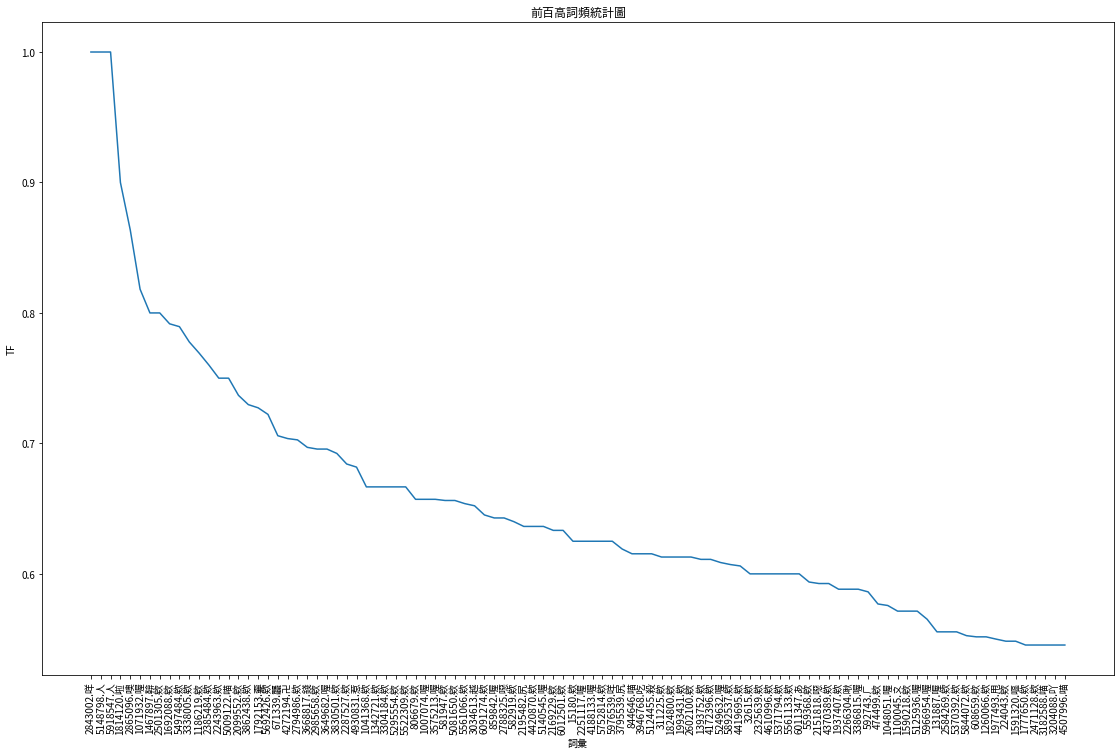

In [52]:
## 詞頻統計圖
x_axis = []
y_axis = []

for item in rtps[:100]:
    x_axis.append(str(item[0]) + '.' + item[1])
    y_axis.append(item[2])

print(">>> 前百高TF統計圖\n")

plt.figure(figsize = (19.2 , 12))
plt.plot(x_axis, y_axis)
plt.title("前百高詞頻統計圖")
plt.xlabel("詞彙")
plt.xticks(rotation = 90)
plt.ylabel("TF")
plt.show()

>>> 前百高TF-IDF權重統計圖



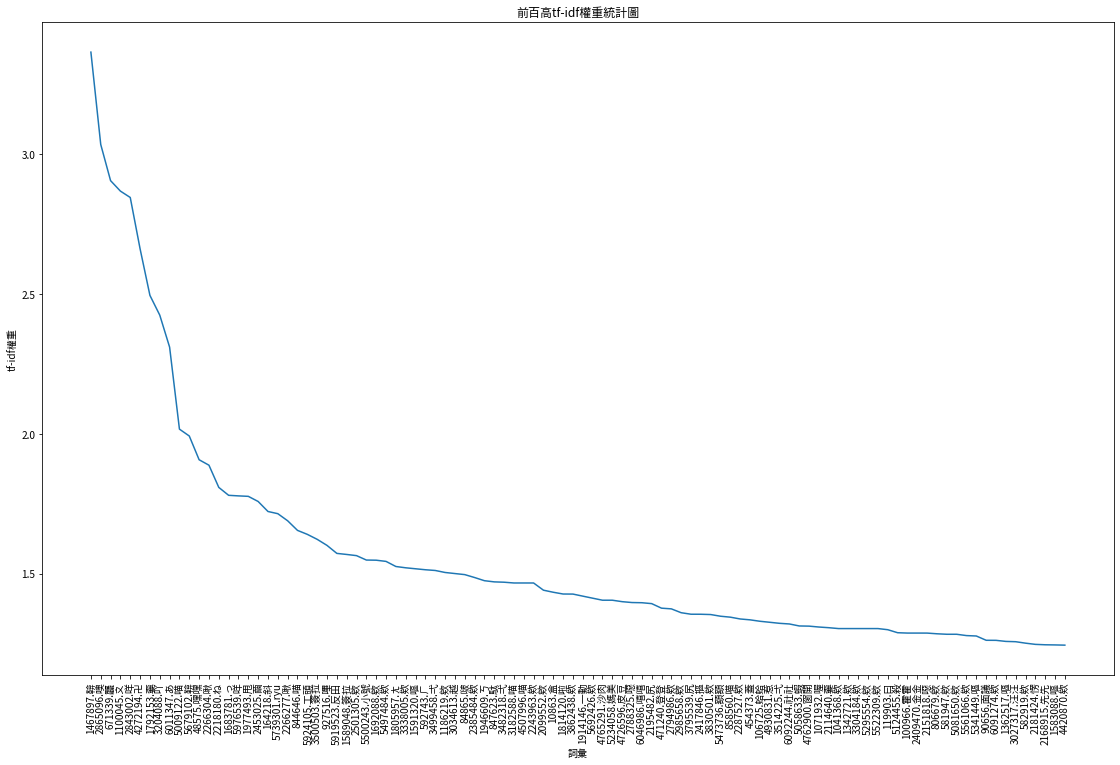

In [60]:
## tf-idf統計圖
x_axis = []
y_axis = []

for item in rtf_idfs[:100]:
    x_axis.append(str(item[0]) + '.' + item[1])
    y_axis.append(item[2])

print(">>> 前百高TF-IDF權重統計圖\n")

plt.figure(figsize = (19.2 , 12))
plt.plot(x_axis, y_axis)
plt.title("前百高tf-idf權重統計圖")
plt.xlabel("詞彙")
plt.xticks(rotation = 90)
plt.ylabel("tf-idf權重")
plt.show()

>>> 文字雲



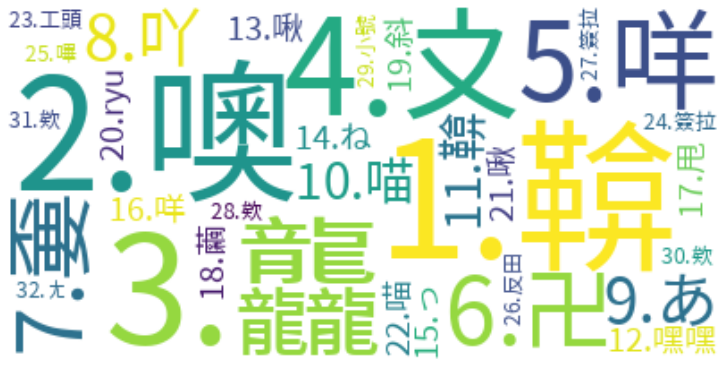

In [61]:
from wordcloud import WordCloud, STOPWORDS
X = 1
freq = {}
for l in rtf_idfs[:32]:
    freq[str(X) + '.' + l[1]] = l[2]
    X += 1

print(">>> 文字雲\n")

wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue', font_path= 'TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(freq)
plt.figure(figsize = (12.8 , 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 詞頻統計圖 (不重複單詞)

>>> 前百高TF統計圖(不重複詞)



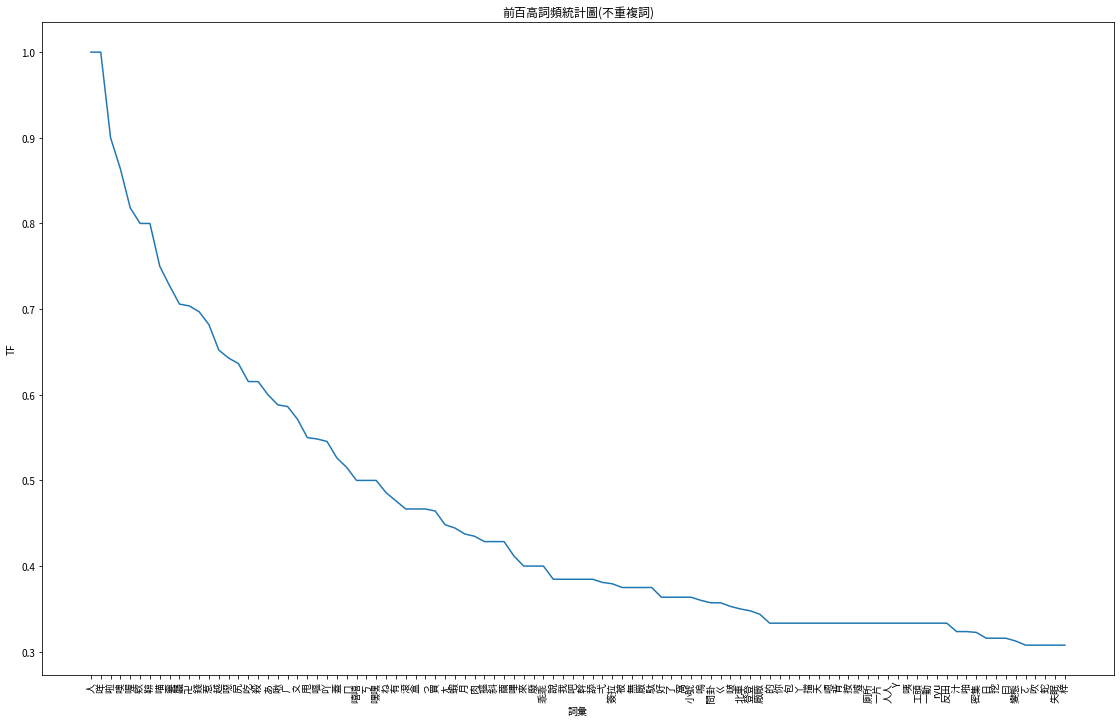

In [58]:
## 詞頻統計圖 (不重複詞)
x_axis = list(dict_tfs.keys())
y_axis = list(dict_tfs.values())

print(">>> 前百高TF統計圖(不重複詞)\n")

plt.figure(figsize = (19.2 , 12))
plt.plot(x_axis, y_axis)
plt.title("前百高詞頻統計圖(不重複詞)")
plt.xlabel("詞彙")
plt.xticks(rotation = 90)
plt.ylabel("TF")
plt.show()

>>> 前百高TF-IDF權重統計圖(不重複詞)



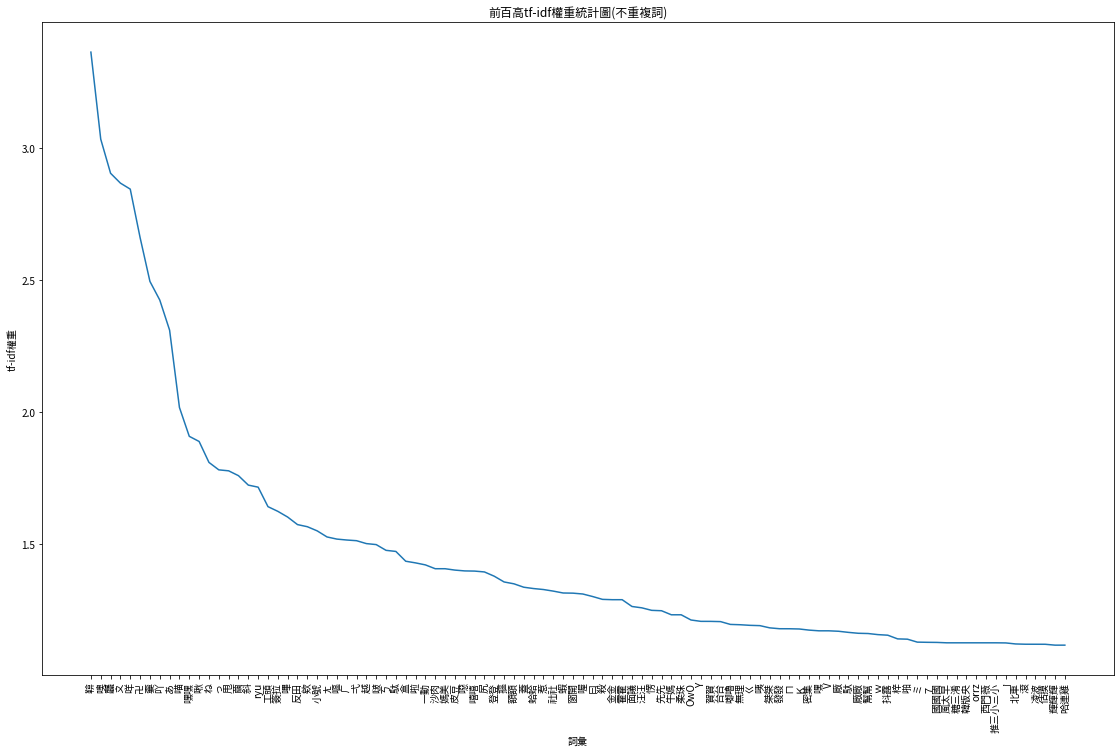

In [59]:
## tf-idf統計圖 (不重複詞)
x_axis = list(dict_tf_idfs.keys())
y_axis = list(dict_tf_idfs.values())

print(">>> 前百高TF-IDF權重統計圖(不重複詞)\n")

plt.figure(figsize = (19.2 , 12))
plt.plot(x_axis, y_axis)
plt.title("前百高tf-idf權重統計圖(不重複詞)")
plt.xlabel("詞彙")
plt.xticks(rotation = 90)
plt.ylabel("tf-idf權重")
plt.show()

>>> 文字雲(不重複詞)



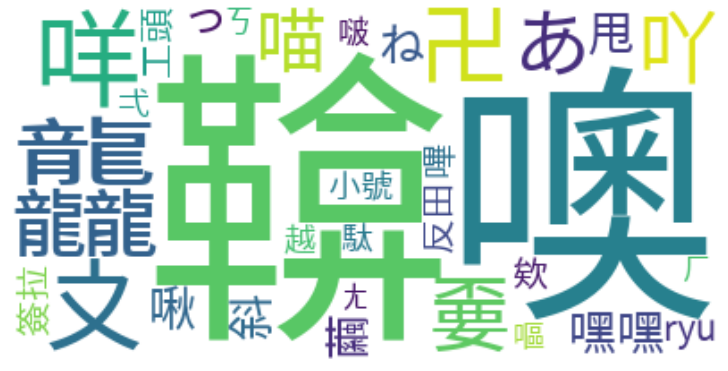

In [62]:
## 文字雲 (不重複詞)
from wordcloud import WordCloud, STOPWORDS

lt = list(dict_tf_idfs.items())[:32]
freq = {}
for l in lt:
    freq[l[0]] = l[1]

print(">>> 文字雲(不重複詞)\n")

wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue', font_path= 'TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(freq)
plt.figure(figsize = (12.8 , 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()